
=== AEP | Period: 2wk ===


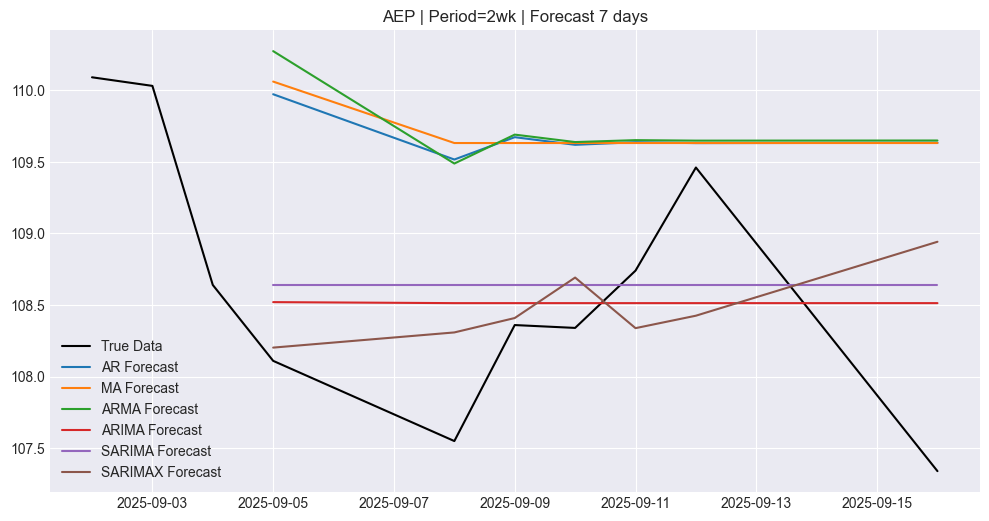


=== AEP | Period: 6mo ===


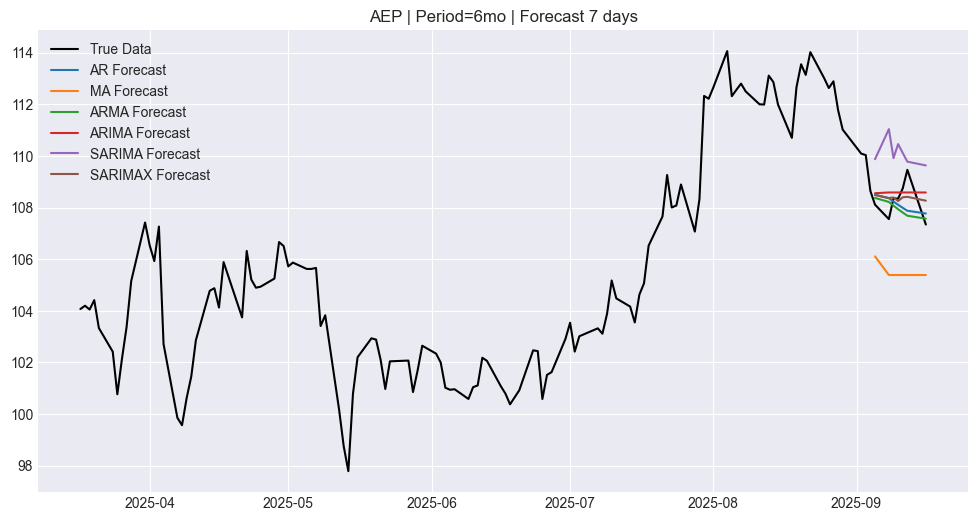


=== AEP | Period: 1y ===


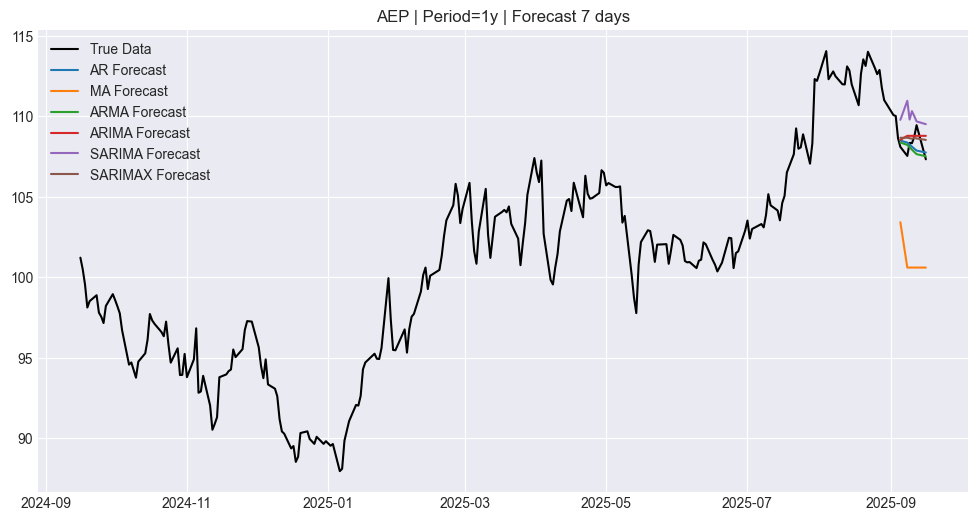


=== DUK | Period: 2wk ===


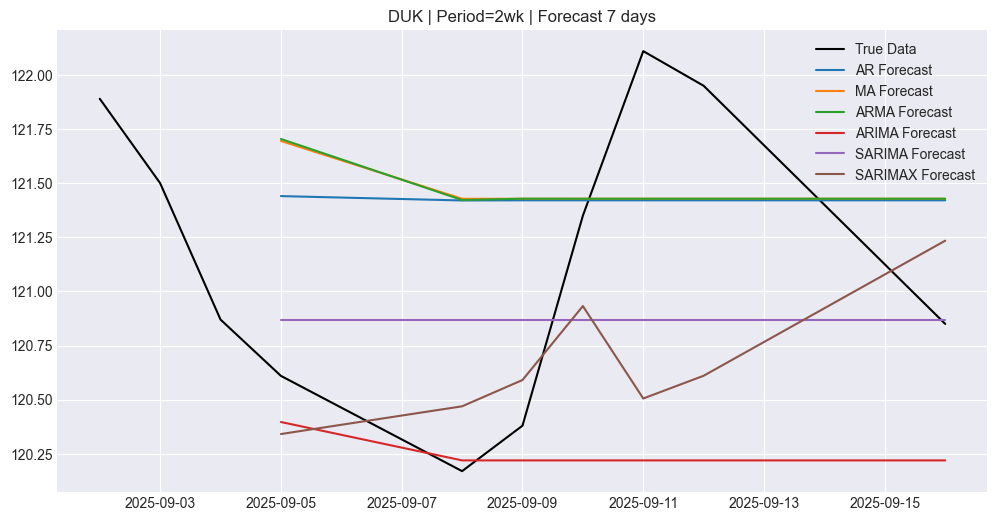


=== DUK | Period: 6mo ===


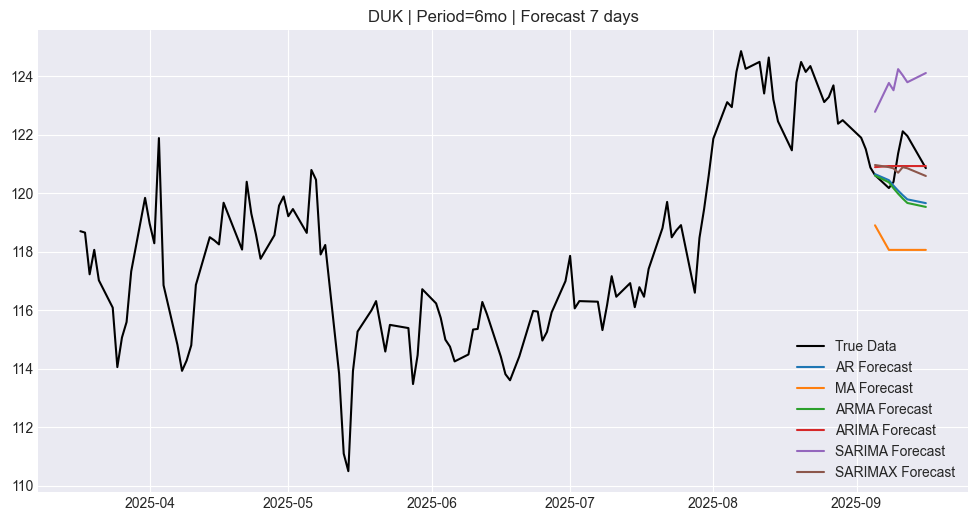


=== DUK | Period: 1y ===


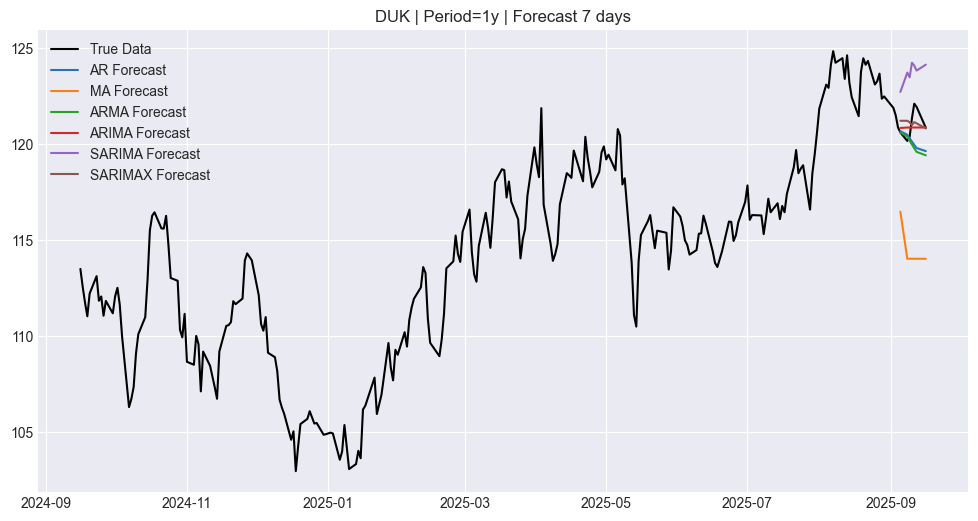


=== SO | Period: 2wk ===


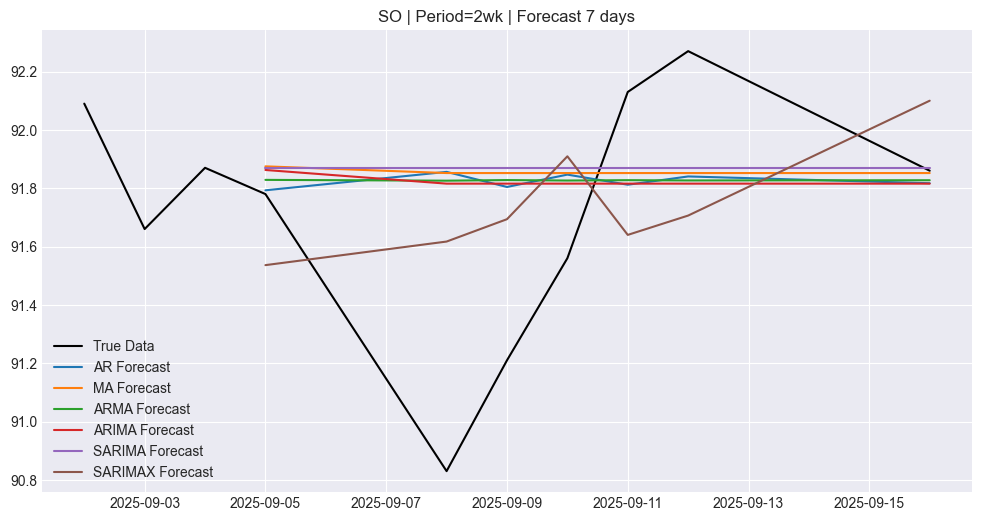


=== SO | Period: 6mo ===


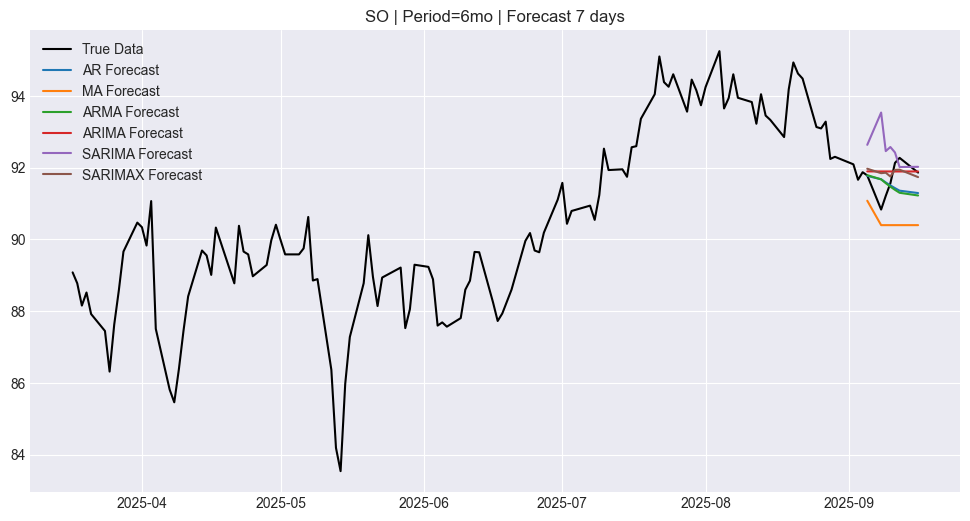


=== SO | Period: 1y ===


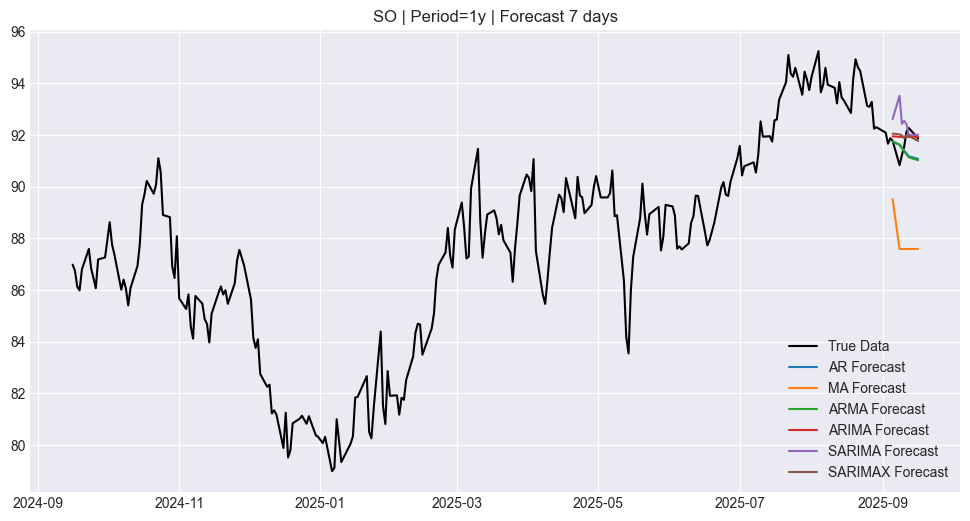


=== ED | Period: 2wk ===


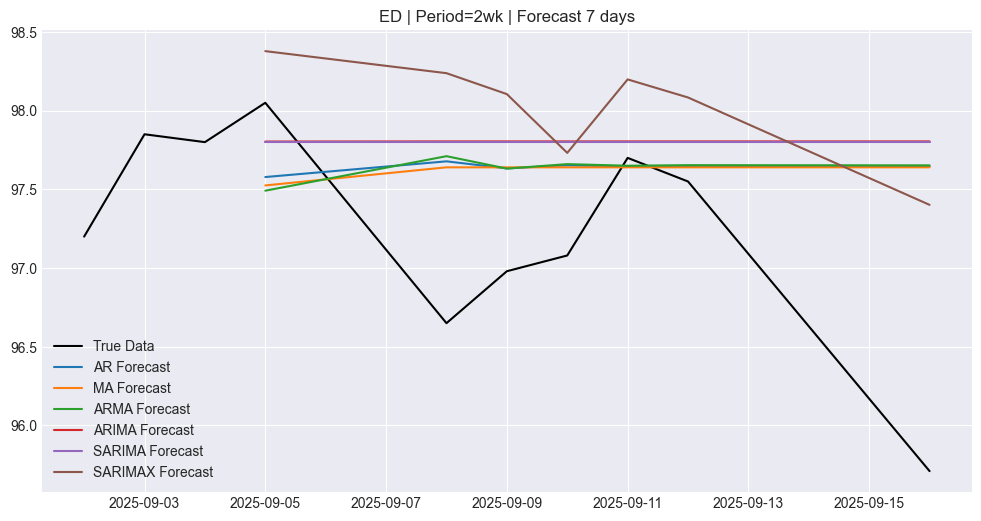


=== ED | Period: 6mo ===


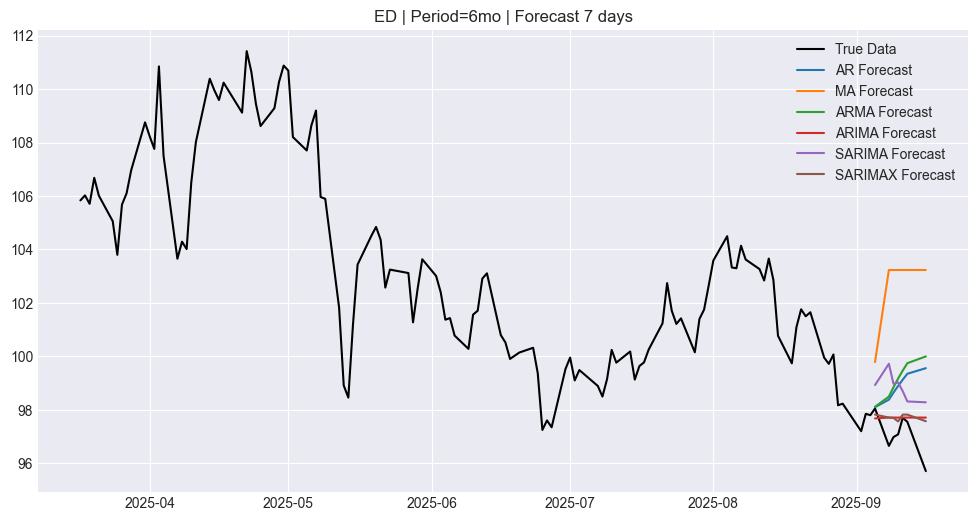


=== ED | Period: 1y ===


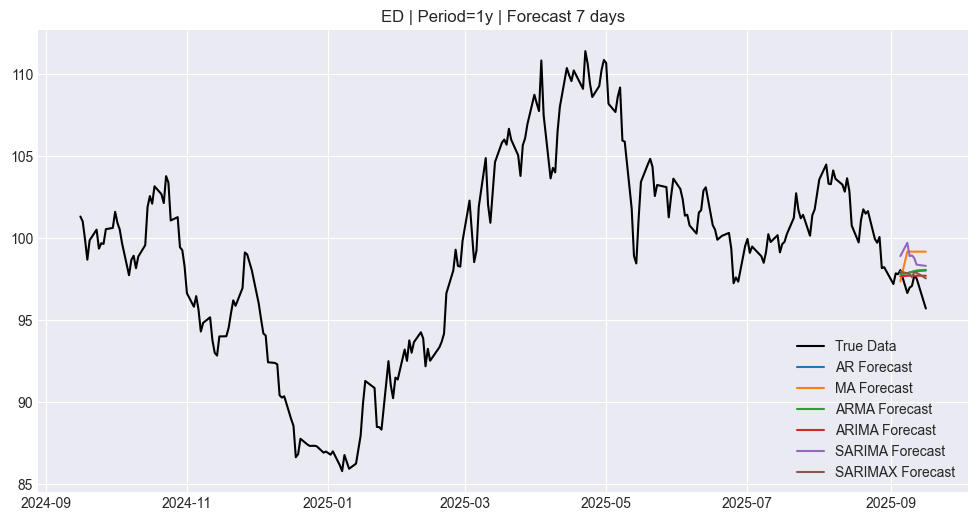


=== EXC | Period: 2wk ===


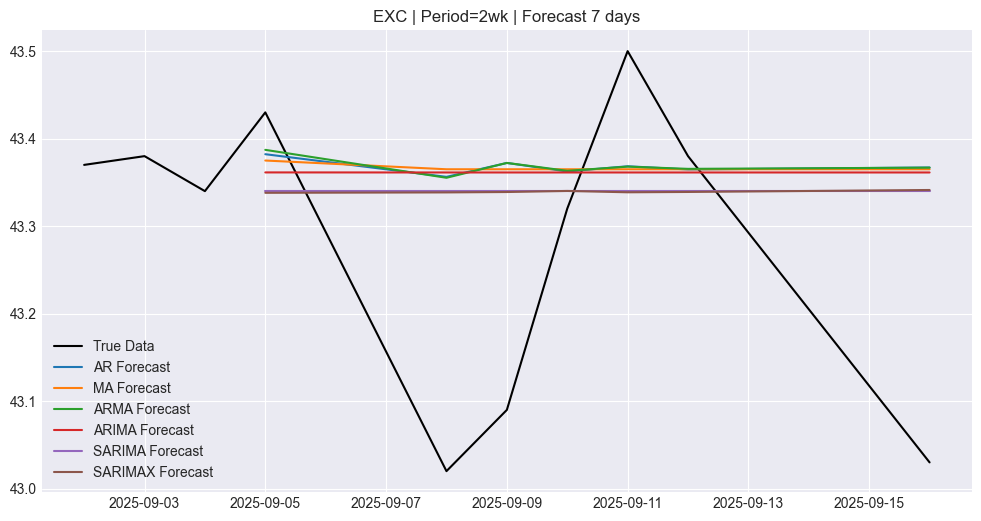


=== EXC | Period: 6mo ===


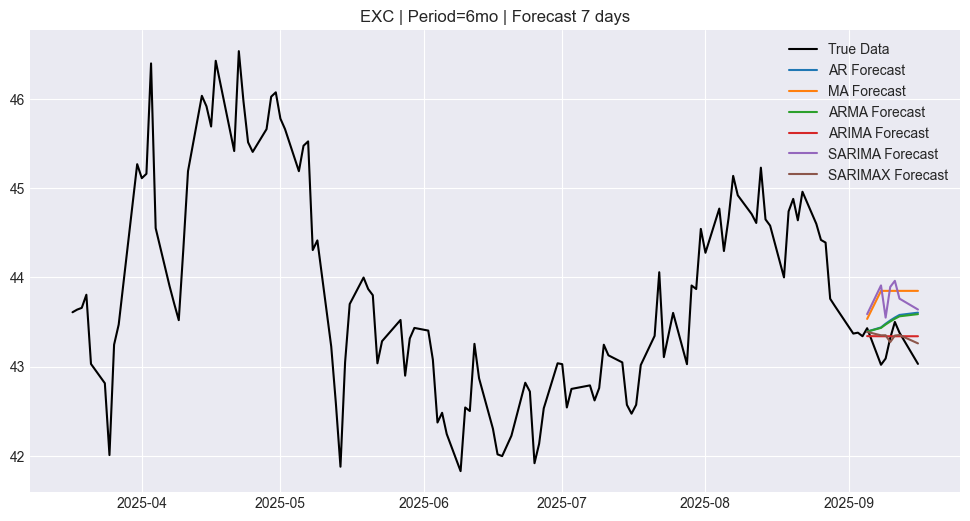


=== EXC | Period: 1y ===


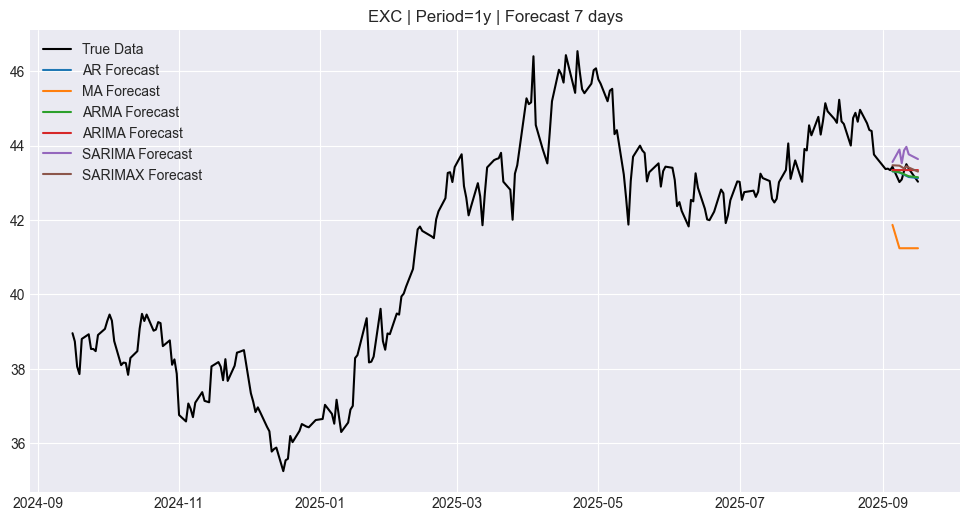

AR_RMSE  AR_MAE  MA_RMSE  MA_MAE  ARMA_RMSE  ARMA_MAE  \
Ticker Period                                                          
AEP    2wk      1.5480  1.3968   1.5806  1.4209     1.6071    1.4479   
       6mo      0.7689  0.6181   2.8793  2.7850     0.8322    0.6516   
       1y       0.7668  0.6129   7.3606  7.2554     0.8397    0.6512   
DUK    2wk      0.7948  0.7117   0.8397  0.7501     0.8403    0.7507   
       6mo      1.3414  1.0354   3.0021  2.8846     1.4273    1.1026   
       1y       1.3254  1.0263   6.7966  6.6817     1.4596    1.1272   
SO     2wk      0.5037  0.3872   0.5075  0.3936     0.4980    0.3867   
       6mo      0.5989  0.4964   1.2747  1.1703     0.6282    0.5229   
       1y       0.6852  0.5749   3.8828  3.8034     0.7080    0.5926   
ED     2wk      0.9101  0.6881   0.9057  0.6879     0.9247    0.7068   
       6mo      2.0413  1.7621   5.8894  5.6375     2.3185    2.0170   
       1y       1.1178  0.8904   2.1688  2.0111     1.1323    0.9067   
EXC    2wk      0.2164  0.1704   0.2172  0.1721     0.2161    0.1696   
       6mo      0.3251  0.2666   0.6052  0.5508     0.3159    0.2566   
       1y       0.1981  0.1821   1.9343  1.9210     0.1942    0.1800   

               ARIMA_RMSE  ARIMA_MAE  SARIMA_RMSE  SARIMA_MAE  SARIMAX_RMSE  \
Ticker Period                                                                 
AEP    2wk         0.7044     0.5780       0.7569      0.6314        0.8024   
       6mo         0.7282     0.6028       2.0496      1.8433        0.6418   
       1y          0.8207     0.6799       1.9673      1.7497        0.7461   
DUK    2wk         1.0900     0.8292       0.7302      0.6100        0.8364   
       6mo         0.7163     0.6121       2.7611      2.6831        0.7625   
       1y          0.7290     0.6064       2.7663      2.6928        0.7413   
SO     2wk         0.4954     0.3918       0.5140      0.3957        0.4856   
       6mo         0.5230     0.4052       1.2419      0.9320        0.4898   
       1y          0.5388     0.4222       1.2272      0.9175        0.5749   
ED     2wk         1.0044     0.7720       1.0012      0.7686        1.0498   
       6mo         0.9434     0.7089       1.9336      1.7459        0.8866   
       1y          0.9411     0.7065       1.9253      1.7470        0.9248   
EXC    2wk         0.2158     0.1730       0.2059      0.1700        0.2060   
       6mo         0.2057     0.1698       0.5458      0.5045        0.1919   
       1y          0.2064     0.1701       0.5352      0.4922        0.2358   

               SARIMAX_MAE  
Ticker Period               
AEP    2wk          0.6128  
       6mo          0.5176  
       1y           0.6239  
DUK    2wk          0.6464  
       6mo          0.6825  
       1y           0.6603  
SO     2wk          0.4511  
       6mo          0.3839  
       1y           0.4412  
ED     2wk          0.9167  
       6mo          0.6786  
       1y           0.7224  
EXC    2wk          0.1705  
       6mo          0.1554  
       1y           0.1765

In [20]:
# %%
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_squared_error, mean_absolute_error

plt.style.use("seaborn-v0_8-darkgrid")

TICKERS = ["AEP", "DUK", "SO", "ED", "EXC"]
EXOG_TICKER = "CL=F"

FORECAST_HORIZON = 7
TEST_PERIODS = ["2wk", "6mo", "1y"]  # รอบทดสอบ

# ---------------------------------------------------
# Forecast functions
# ---------------------------------------------------
def forecast_ar(train, steps=7):
    return ARIMA(train, order=(1,0,0)).fit().forecast(steps=steps)

def forecast_ma(train, steps=7):
    return ARIMA(train, order=(0,0,1)).fit().forecast(steps=steps)

def forecast_arma(train, steps=7):
    return ARIMA(train, order=(1,0,1)).fit().forecast(steps=steps)

def forecast_arima(train, steps=7, order=(0, 1, 2)):
    return ARIMA(train, order=order).fit().forecast(steps=steps)

def forecast_sarima(train, steps=7, order=(0,1,1), seasonal_order=(1,1,0,12)):
    return SARIMAX(train, order=order, seasonal_order=seasonal_order,
                   enforce_stationarity=False, enforce_invertibility=False).fit(disp=False).forecast(steps=steps)

def forecast_sarimax(train, steps=7, exog_train=None, exog_future=None,
                     order=(0,1,1), seasonal_order=(1,0,1,12)):
    return SARIMAX(train, exog=exog_train,
                   order=order, seasonal_order=seasonal_order,
                   enforce_stationarity=False, enforce_invertibility=False).fit(disp=False).forecast(steps=steps, exog=exog_future)

def eval_metrics(true, pred):
    rmse = np.sqrt(mean_squared_error(true, pred))
    mae = mean_absolute_error(true, pred)
    return rmse, mae

# %%
results = []

# โหลด exogenous data ยาวสุด (1y)
exog_all = yf.download(EXOG_TICKER, period="3y", auto_adjust=True, progress=False)[["Close"]]
exog_all.rename(columns={"Close": "EXOG"}, inplace=True)

for ticker in TICKERS:
    for period in TEST_PERIODS:
        print(f"\n=== {ticker} | Period: {period} ===")
        metrics_dict = {"Ticker": ticker, "Period": period}

        # โหลดข้อมูลหุ้น
        df = yf.download(ticker, period=period, auto_adjust=True, progress=False)
        series = df["Close"].dropna()

        if len(series) <= FORECAST_HORIZON:
            continue

        train, test = series[:-FORECAST_HORIZON], series[-FORECAST_HORIZON:]
        exog = exog_all.loc[series.index].fillna(method="ffill")
        exog_train, exog_future = exog[:-FORECAST_HORIZON], exog[-FORECAST_HORIZON:]

        preds = {}

        # ---------------- Models ----------------
        try:
            preds["AR"] = forecast_ar(train, FORECAST_HORIZON)
            metrics_dict["AR_RMSE"], metrics_dict["AR_MAE"] = eval_metrics(test, preds["AR"])
        except:
            metrics_dict["AR_RMSE"], metrics_dict["AR_MAE"] = np.nan, np.nan

        try:
            preds["MA"] = forecast_ma(train, FORECAST_HORIZON)
            metrics_dict["MA_RMSE"], metrics_dict["MA_MAE"] = eval_metrics(test, preds["MA"])
        except:
            metrics_dict["MA_RMSE"], metrics_dict["MA_MAE"] = np.nan, np.nan

        try:
            preds["ARMA"] = forecast_arma(train, FORECAST_HORIZON)
            metrics_dict["ARMA_RMSE"], metrics_dict["ARMA_MAE"] = eval_metrics(test, preds["ARMA"])
        except:
            metrics_dict["ARMA_RMSE"], metrics_dict["ARMA_MAE"] = np.nan, np.nan

        try:
            preds["ARIMA"] = forecast_arima(train, FORECAST_HORIZON)
            metrics_dict["ARIMA_RMSE"], metrics_dict["ARIMA_MAE"] = eval_metrics(test, preds["ARIMA"])
        except:
            metrics_dict["ARIMA_RMSE"], metrics_dict["ARIMA_MAE"] = np.nan, np.nan

        try:
            preds["SARIMA"] = forecast_sarima(train, FORECAST_HORIZON)
            metrics_dict["SARIMA_RMSE"], metrics_dict["SARIMA_MAE"] = eval_metrics(test, preds["SARIMA"])
        except:
            metrics_dict["SARIMA_RMSE"], metrics_dict["SARIMA_MAE"] = np.nan, np.nan

        try:
            preds["SARIMAX"] = forecast_sarimax(train, FORECAST_HORIZON, exog_train, exog_future)
            metrics_dict["SARIMAX_RMSE"], metrics_dict["SARIMAX_MAE"] = eval_metrics(test, preds["SARIMAX"])
        except:
            metrics_dict["SARIMAX_RMSE"], metrics_dict["SARIMAX_MAE"] = np.nan, np.nan

        results.append(metrics_dict)

        # ---------------- Plot ----------------
        plt.figure(figsize=(12,6))
        plt.plot(series.index, series, label="True Data", color="black")
        for model, pred in preds.items():
            plt.plot(test.index, pred, label=f"{model} Forecast")
        plt.title(f"{ticker} | Period={period} | Forecast {FORECAST_HORIZON} days")
        plt.legend()
        plt.show()

# %%
df_results = pd.DataFrame(results).set_index(["Ticker", "Period"])
df_results.round(4)


In [21]:
# ฟังก์ชันเลือก top5 ต่อช่วงเวลา
def get_top5_by_period(df, period, metric="RMSE"):
    subset = df.xs(period, level="Period")  # เลือกข้อมูลช่วงนั้น
    melted = subset.reset_index().melt(
        id_vars=["Ticker"],
        value_vars=[c for c in subset.columns if metric in c],
        var_name="Model", value_name=metric
    )
    # ตัด suffix เช่น "_RMSE"
    melted["Model"] = melted["Model"].str.replace(f"_{metric}", "", regex=False)
    # ค่าเฉลี่ย error ของแต่ละโมเดลรวมทุกหุ้น
    avg_scores = melted.groupby("Model")[metric].mean().sort_values()
    return avg_scores.head(5)

# แสดงผล top5 ของแต่ละช่วง
for period in TEST_PERIODS:
    print(f"\n=== Top 5 Models ({period}) by RMSE ===")
    top5 = get_top5_by_period(df_results, period, metric="RMSE")
    print(top5.round(4).to_string())
    
    print(f"\n=== Top 5 Models ({period}) by MAE ===")
    top5 = get_top5_by_period(df_results, period, metric="MAE")
    print(top5.round(4).to_string())



=== Top 5 Models (2wk) by RMSE ===
Model
SARIMA     0.6416
SARIMAX    0.6760
ARIMA      0.7020
AR         0.7946
MA         0.8101

=== Top 5 Models (2wk) by MAE ===
Model
SARIMA     0.5151
ARIMA      0.5488
SARIMAX    0.5595
AR         0.6708
MA         0.6849

=== Top 5 Models (6mo) by RMSE ===
Model
SARIMAX    0.5945
ARIMA      0.6233
AR         1.0151
ARMA       1.1044
SARIMA     1.7064

=== Top 5 Models (6mo) by MAE ===
Model
SARIMAX    0.4836
ARIMA      0.4998
AR         0.8357
ARMA       0.9101
SARIMA     1.5418

=== Top 5 Models (1y) by RMSE ===
Model
SARIMAX    0.6446
ARIMA      0.6472
AR         0.8187
ARMA       0.8668
SARIMA     1.6843

=== Top 5 Models (1y) by MAE ===
Model
ARIMA      0.5170
SARIMAX    0.5249
AR         0.6573
ARMA       0.6916
SARIMA     1.5198
